## a. Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.max_rows = None
pd.options.display.max_columns = None

/var/folders/yn/nm3p0byd26vdh5pkn2k9g3rm0000gn/T/ipykernel_48024/2934600593.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv("rideshare_kaggle.csv")
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [4]:
df['datetime']=pd.to_datetime(df['datetime'])

### Data Cleaning

In [5]:
# Checking if there are duplicated rows
print('{} of data is duplicated rows'.format(
    str(round(df.duplicated().sum() / df.size * 100,5))+'%'))

0.0% of data is duplicated rows


In [6]:
# Checking if there are Nulvalues
print('{} of data is NuLL'.format(
    str(round(df.isna().sum().sum() / df.size * 100,3))+'%'))


0.139% of data is NuLL


<Axes: >

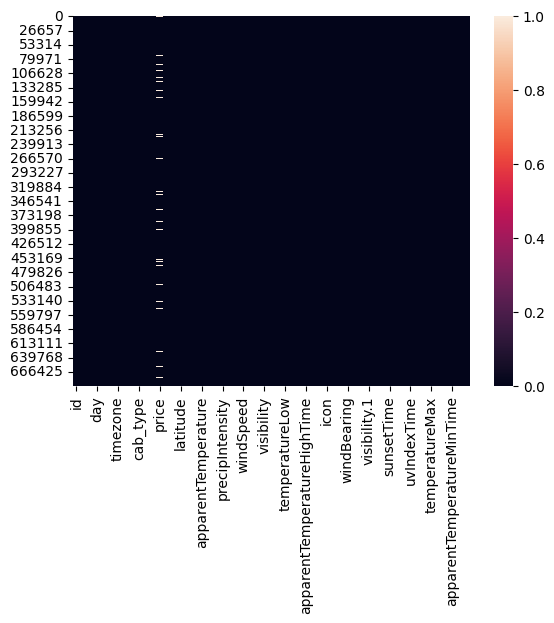

In [7]:
cols = df.columns
sns.heatmap(df[cols].isnull())
# only price columns has all the null values

In [8]:
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [9]:
#info on null records
null_records = df.isnull().sum().sum()
print('The number of null records in the dataset : ', null_records)

The number of null records in the dataset :  55095


In [10]:
# to remove the null records
df.dropna(axis=0,inplace=True)

In [11]:
# verifying if there are any null records
updated_null_records = df.isnull().sum().sum()
updated_null_records

0

In [12]:
# visibility and visibility.1 are duplicate columns hence removing 
## self comment - df['visibility'].sum() check using this and see if you get the same total with vis1 or
visibilityCheck = df['visibility'].equals(df['visibility.1'])
visibilityCheck
df = df.drop(['visibility.1'],axis=1)

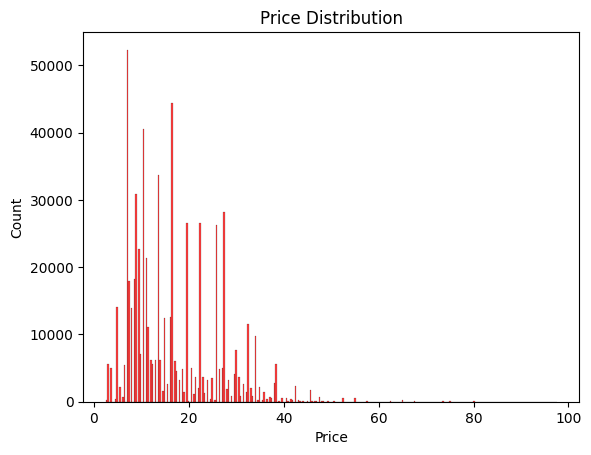

In [14]:

# Plotting
sns.histplot(df['price'], color='red', kde=False)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

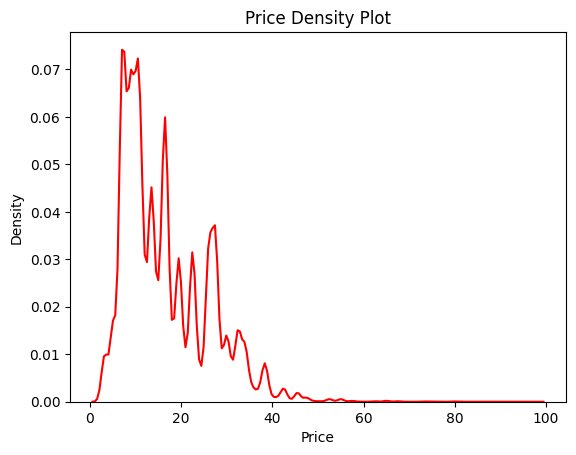

In [15]:
sns.kdeplot(df['price'], color='red')
plt.title('Price Density Plot')
plt.xlabel('Price')
plt.show()

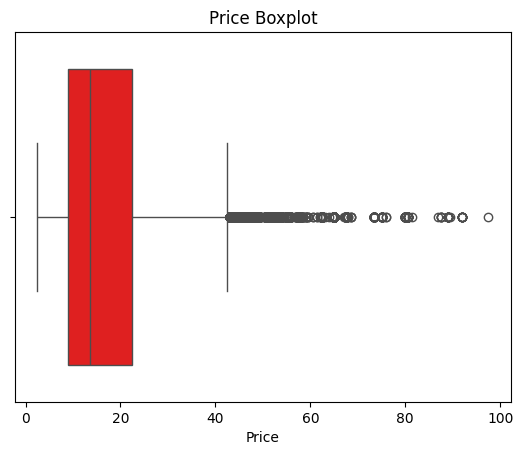

In [16]:

# Assuming data is already loaded
sns.boxplot(x=df['price'], color='red')
plt.title('Price Boxplot')
plt.xlabel('Price')
plt.show()


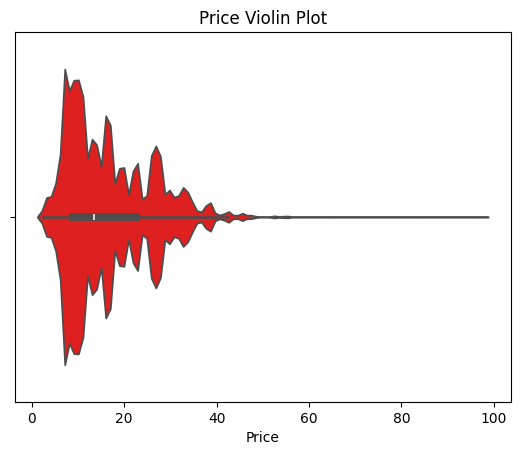

In [17]:


# Assuming data is already loaded
sns.violinplot(x=df['price'], color='red')
plt.title('Price Violin Plot')
plt.xlabel('Price')
plt.show()


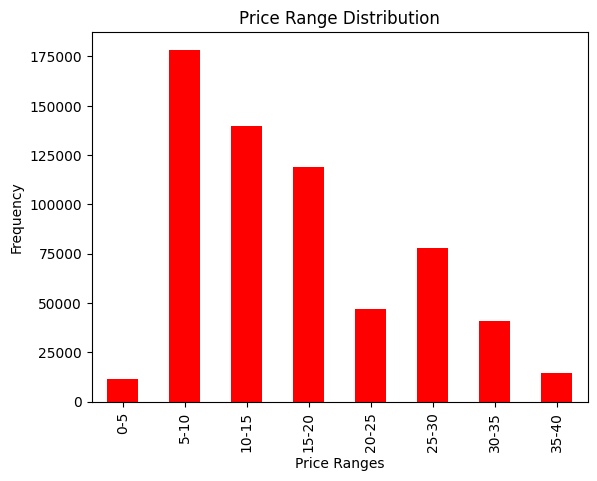

In [22]:


# Assuming you have a DataFrame df with a column 'price'
# Create bins
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]  # Define your bins as needed
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30','30-35','35-40']
df['price_bin'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Get value counts of each bin
bin_counts = df['price_bin'].value_counts().sort_index()

# Plotting
bin_counts.plot(kind='bar', color='red')
plt.title('Price Range Distribution')
plt.xlabel('Price Ranges')
plt.ylabel('Frequency')
plt.show()


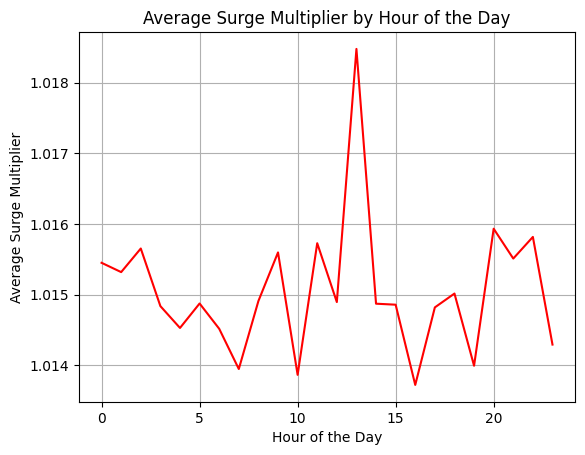

In [30]:
# Grouping by hour and calculating the average surge multiplier
hourly_surge = df.groupby('hour')['surge_multiplier'].mean().reset_index()

# Plotting the line graph with red color
plt.plot(hourly_surge['hour'], hourly_surge['surge_multiplier'], color='red')
plt.title('Average Surge Multiplier by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Surge Multiplier')
plt.grid(True)
plt.show()

Additional Notes :
1. all data points are of the same year but we need it calculate minutes between each trip so do we delete it? but agaim do not have end trip duration to calculate trip interval

## b. EDA and Visualization

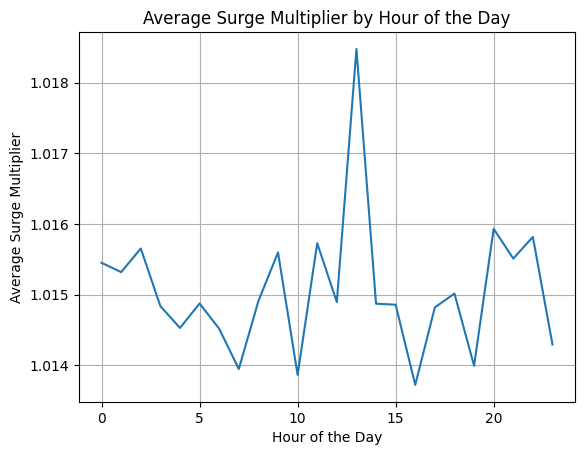

In [42]:
# Grouping by hour and calculating the average surge multiplier
hourly_surge = df.groupby('hour')['surge_multiplier'].mean().reset_index()

# Plotting the line graph
plt.plot(hourly_surge['hour'], hourly_surge['surge_multiplier'])
plt.title('Average Surge Multiplier by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Surge Multiplier')
plt.grid(True)
plt.show()

### 1. Time Series

Month data

<Axes: xlabel='month'>

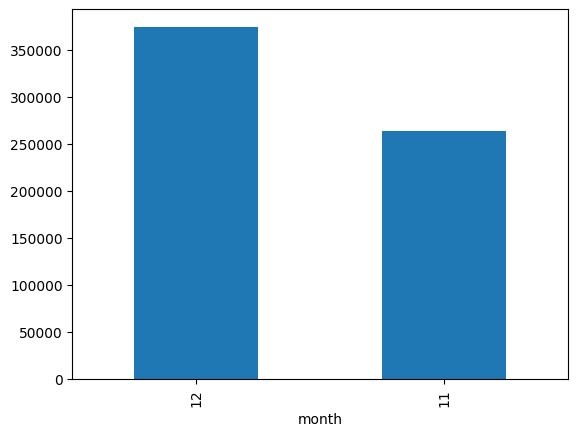

In [20]:
df['month'].value_counts().plot(kind='bar')

<Axes: title={'center': 'TBD - distribution of month col'}, ylabel='count'>

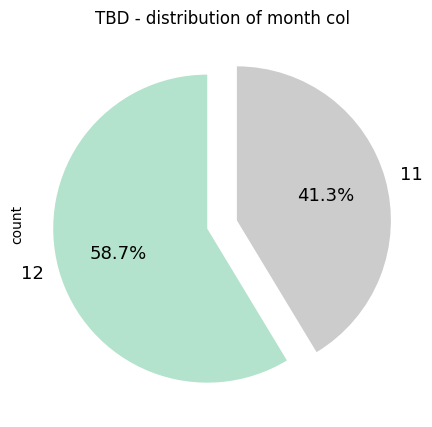

In [13]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    explode    = (0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'TBD - distribution of month col'
)

df['month'].value_counts().plot.pie(**kwargs)

### It appears that we only have november and december in our month data. It means the data is only recorded or taken in november and december with december data dominating

### 2. Day Data

Text(0, 0.5, 'Frequency')

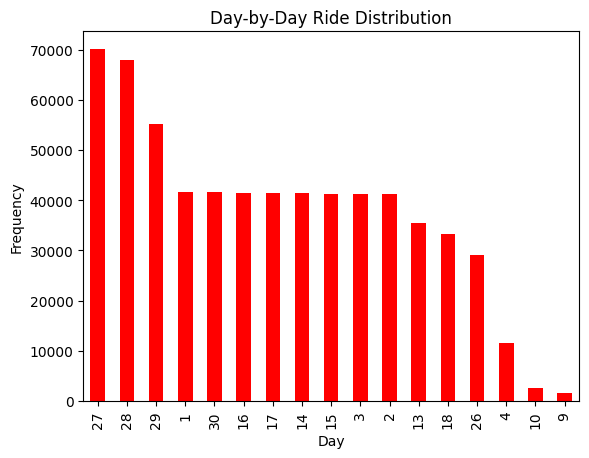

In [43]:

df['day'].value_counts().plot(kind='bar', color='red')
plt.title("Day-by-Day Ride Distribution")
plt.xlabel("Day")
plt.ylabel("Frequency")

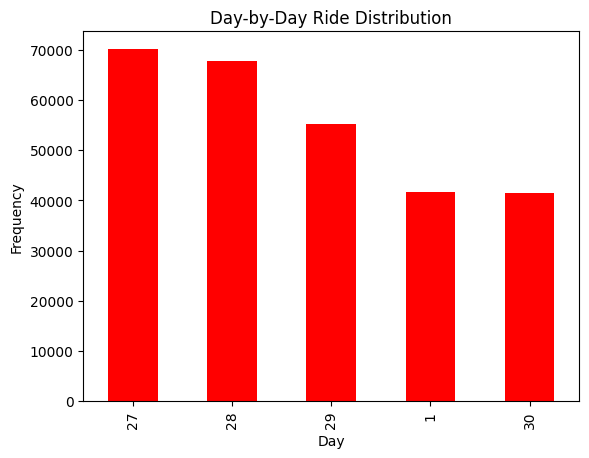

In [18]:
day_counts = df['day'].value_counts()

# Slice to get the top 5 days
top_5_days = day_counts.head(5)

# Plotting
top_5_days.plot(kind='bar', color='red')
plt.title("Day-by-Day Ride Distribution")
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.show()

([<matplotlib.patches.Wedge at 0x1675d1130>,
 [Text(0.6018112140505569, 0.9207731874044742, ' cloudy '),
  Text(-0.994595128330795, 0.4698728878118525, ' partly-cloudy-night '),
  Text(-0.7673724848010052, -0.788124019155825, ' partly-cloudy-day '),
  Text(0.24557720635597322, -1.0722368375123081, ' rain '),
  Text(0.9088634135524151, -0.6196509465060568, ' clear-night '),
  Text(1.077370219583778, -0.22197614726362486, ' clear-day '),
  Text(1.0990831239157568, -0.04490308144862181, ' fog ')],
 [Text(0.32826066220939465, 0.5022399204024404, '31.573%'),
  Text(-0.542506433634979, 0.25629430244282864, '22.805%'),
  Text(-0.41856680989145734, -0.42988582863044994, '16.668%'),
  Text(0.13395120346689446, -0.5848564568248953, '15.074%'),
  Text(0.4957436801194991, -0.33799142536694, '8.711%'),
  Text(0.5876564834093333, -0.12107789850743172, '3.868%'),
  Text(0.5994998857722309, -0.02449258988106644, '1.300%')])

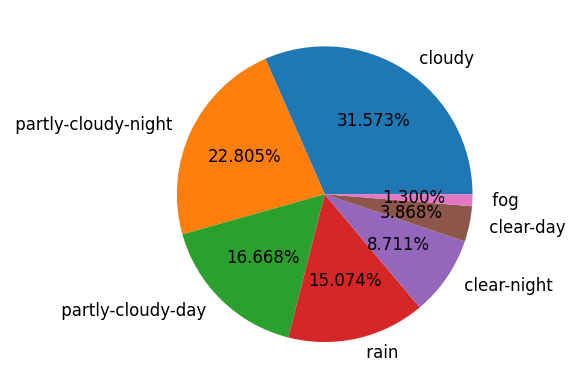

In [19]:
plt.pie(df['icon'].value_counts(),
        labels=list(df['icon'].value_counts().index),autopct ='%1.3f%%',
        textprops={"fontsize":12})

### 3. Source and Destination Analysis¶


In [15]:
df['source'].value_counts()

source
Financial District         54197
Back Bay                   53201
Theatre District           53201
Boston University          53172
North End                  53171
Fenway                     53166
Northeastern University    53164
South Station              53160
Haymarket Square           53147
West End                   52980
Beacon Hill                52841
North Station              52576
Name: count, dtype: int64

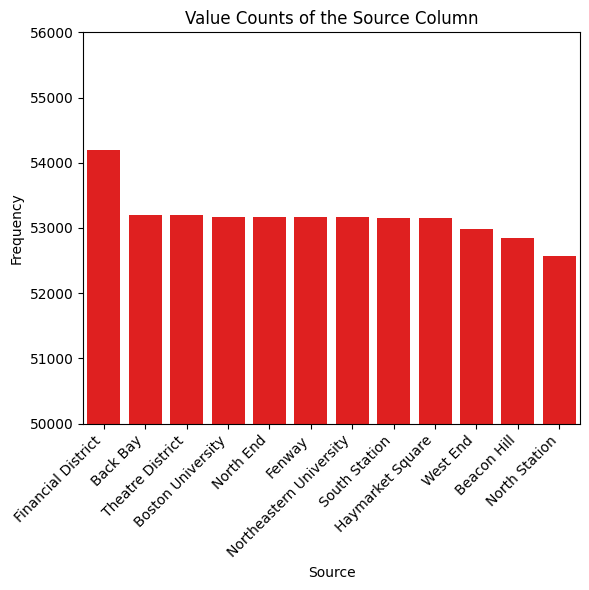

In [16]:
source_counts = df['source'].value_counts().reset_index()
source_counts.columns = ['source', 'n']
source_counts = source_counts.sort_values(by='n', ascending=False)

# Plotting
plt.figure(figsize=(6, 6))
sns.barplot(data=source_counts, x='source', y='n', color="red")
plt.title("Value Counts of the Source Column")
plt.xlabel("Source")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')  # Rotate labels to match R's hjust=1

# Optional: set y-axis limits if needed
plt.ylim(50000, 56000)

plt.tight_layout()
plt.show()

#### Cabs have been booked from Financial District the most
Here we make a geospatial map to visualize our data which the departure point of the trips is Financial District. The map rendered by folium is interactive, we can slide, drag, and zoom in/out 

In [17]:
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
df1 = df[df['source']=='Financial District']
my_map = folium.Map(location=[df1["latitude"].mean(), df1["longitude"].mean()],zoom_start = 10)
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),color='green'))
my_map

/Users/prajwalkulkarni/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


We can see that trips with sources are Financial District have 3 groups or clusters of destination that contain many places (we can see them if we zoom the map). Many of them are in Boston area with 47140 data points.

### 4. Cab type analysis

<Axes: xlabel='cab_type'>

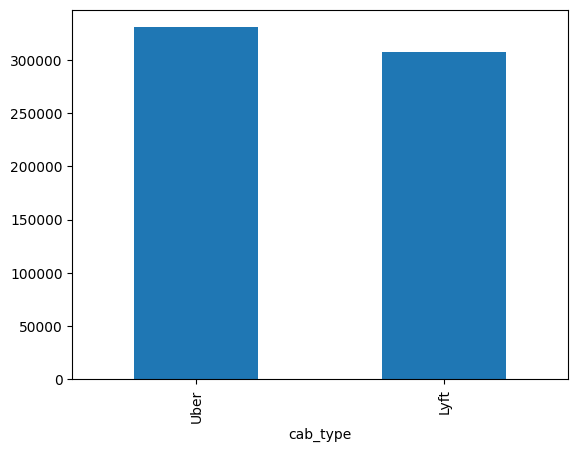

In [21]:
df['cab_type'].value_counts().plot(kind='bar')

/var/folders/yn/nm3p0byd26vdh5pkn2k9g3rm0000gn/T/ipykernel_39888/337771613.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=cab_type_counts, x='cab_type', y='n', palette="Reds")


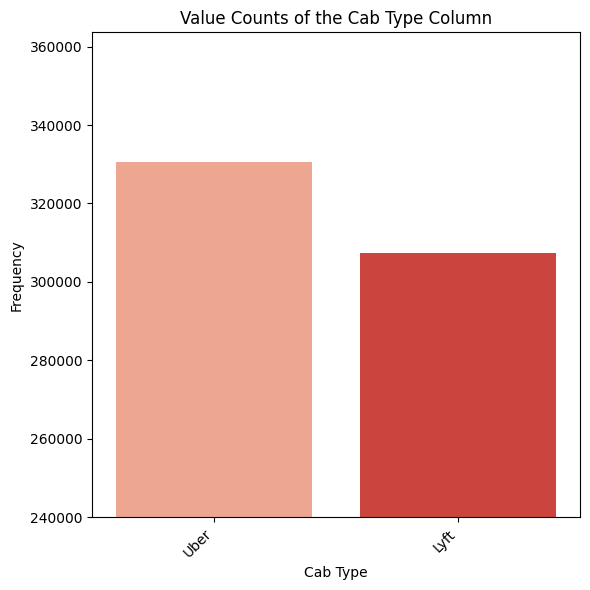

In [17]:
cab_type_counts = df['cab_type'].value_counts().reset_index()
cab_type_counts.columns = ['cab_type', 'n']
cab_type_counts = cab_type_counts.sort_values(by='n', ascending=False)

# Plotting
plt.figure(figsize=(6, 6))
bar_plot = sns.barplot(data=cab_type_counts, x='cab_type', y='n', palette="Reds")
bar_plot.set_title("Value Counts of the Cab Type Column")
bar_plot.set_xlabel("Cab Type")
bar_plot.set_ylabel("Frequency")
plt.xticks(rotation=45, ha='right')  # Align text similar to R's hjust=1

# Optional: set y-axis limits if needed
plt.ylim(240000, cab_type_counts['n'].max() * 1.1)

plt.tight_layout()
plt.show()

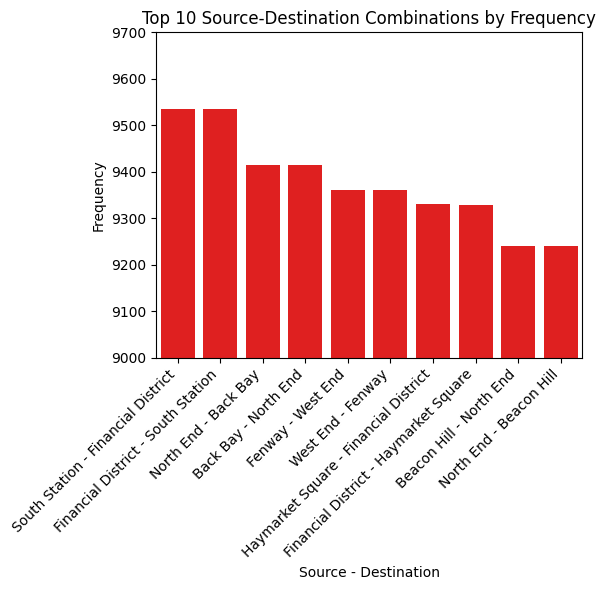

In [24]:
# Group by source and destination and count occurrences
grouped = df.groupby(['source', 'destination']).size().reset_index(name='count')

# Sort the counts descending and select the most frequent
most_frequent_combos = grouped.sort_values(by='count', ascending=False).head(10)

# Create a new column combining source and destination
most_frequent_combos['source_destination'] = most_frequent_combos['source'] + " - " + most_frequent_combos['destination']

# Plotting
plt.figure(figsize=(6, 6))
bar_plot = sns.barplot(data=most_frequent_combos, x='source_destination', y='count', color='red')  # Set bar color to red
bar_plot.set_title("Top 10 Source-Destination Combinations by Frequency")
bar_plot.set_xlabel("Source - Destination")
bar_plot.set_ylabel("Frequency")
plt.xticks(rotation=45, ha='right')  # Align text similar to R's hjust=1

# Optional: set y-axis limits if needed
plt.ylim(9000, 9700)

plt.tight_layout()
plt.show()

### 5. 

In [22]:
df2 =df.groupby(by=["day","cab_type"]).size().reset_index(name="counts")
fig2 = px.bar(data_frame=df2, x="day", y="counts", color="cab_type", barmode="group")
fig2

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'cab_type=Lyft<br>day=%{x}<br>counts=%{y}<extra></extra>',
              'legendgroup': 'Lyft',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Lyft',
              'offsetgroup': 'Lyft',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([ 1,  2,  3,  4,  9, 10, 13, 14, 15, 16, 17, 18, 26, 27, 28, 29, 30]),
              'xaxis': 'x',
              'y': array([20289, 19845, 20021,  5704,   668,  1212, 17005, 20151, 19906, 20039,
                          19685, 15958, 14000, 33755, 32791, 26466, 19913]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'cab_type=Uber<br>day=%{x}<br>counts=%{y}<extra></extra>',
              'legendgroup': 'Uber',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'Uber',
              'offsetgroup': 'Uber',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([ 1,  2,  3,  4,  9, 10, 13, 14, 15, 16, 17, 18, 26, 27, 28, 29, 30]),
              'xaxis': 'x',
              'y': array([21391, 21453, 21302,  5923,   861,  1322, 18491, 21193, 21426, 21320,
                          21669, 17371, 15028, 36380, 35051, 28756, 21631]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'group',
               'legend': {'title': {'text': 'cab_type'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'day'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'counts'}}}
})

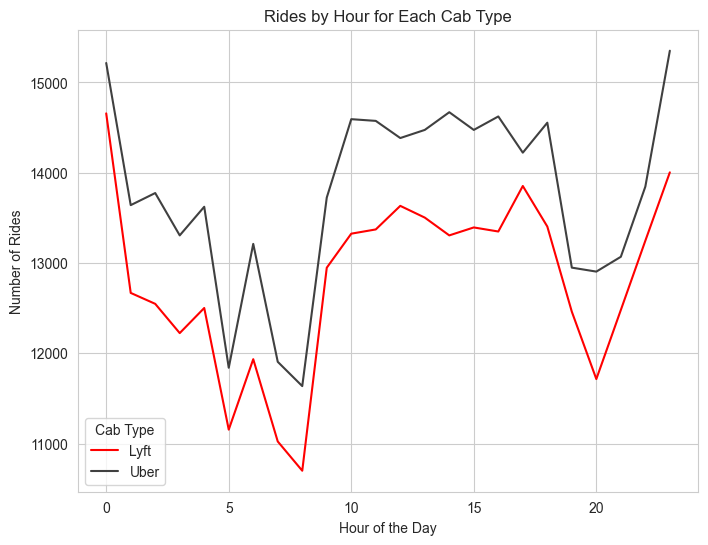

In [32]:
rides_by_hour = df.groupby(['cab_type', 'hour']).size().reset_index(name='rides')
colors = ['#FF0000', '#404040']# Plotting
plt.figure(figsize=(8, 6))
sns.lineplot(data=rides_by_hour, x='hour', y='rides', hue='cab_type', palette=colors, style='cab_type', dashes=False)
plt.title("Rides by Hour for Each Cab Type")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.legend(title='Cab Type')
#plt.palette("Reds")
sns.color_palette("flare", as_cmap=True)

plt.show()

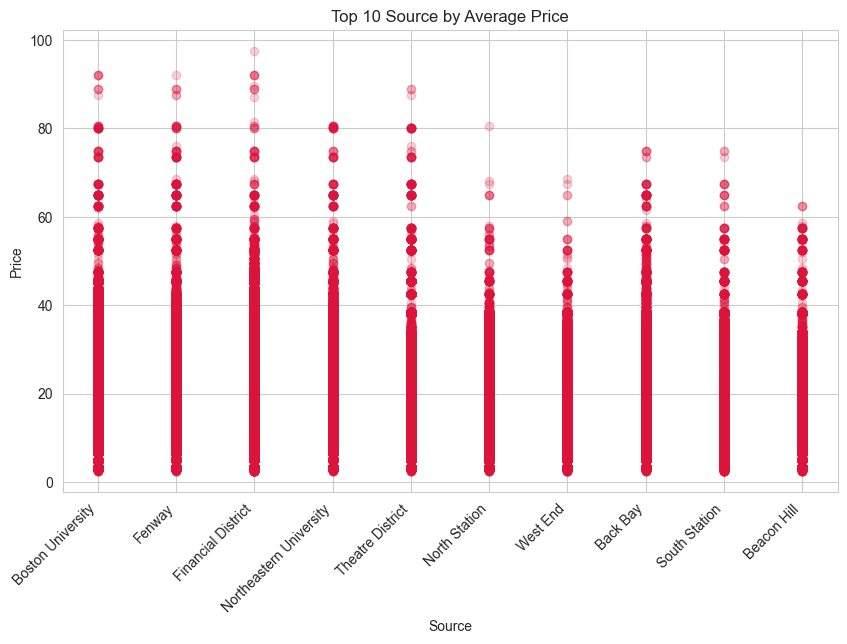

In [59]:
# Calculate the average price for each source
avg_price = df.groupby('source')['price'].mean().reset_index()
avg_price.columns = ['source', 'avg_price']

# Select the top 10 sources based on average price and sort in descending order
top_10 = avg_price.nlargest(10, 'avg_price')

# Merge top 10 sources with original data to get corresponding prices
top_10_with_prices = pd.merge(top_10, df, on='source', how='left')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top_10_with_prices['source'], top_10_with_prices['price'], color='crimson', alpha=0.19)
plt.title("Top 10 Source by Average Price")
plt.xlabel("Source")
plt.ylabel("Price")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)

plt.show()

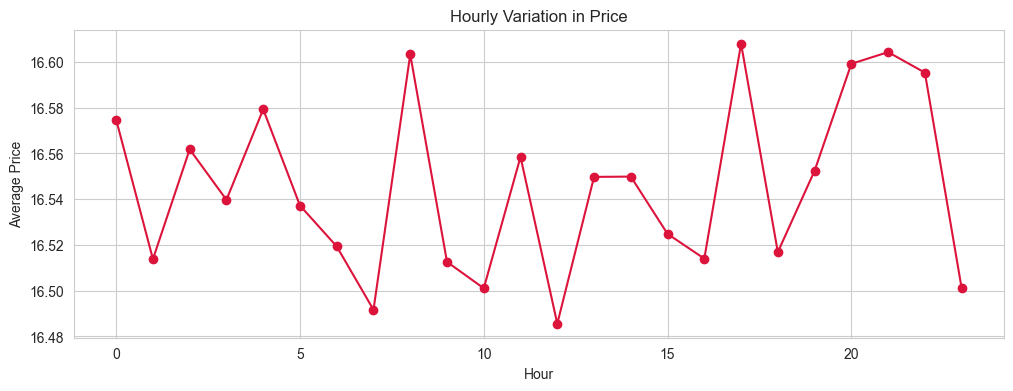

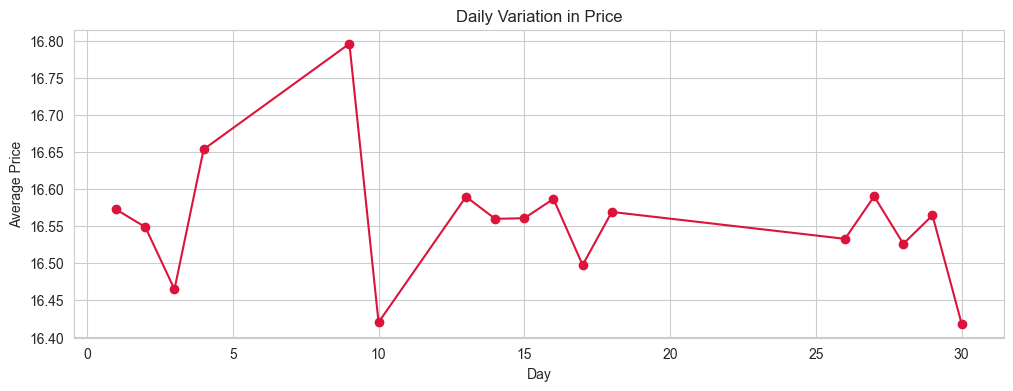

In [65]:
price_hourly = df.groupby('hour')['price'].mean()
plt.figure(figsize=(12, 4))
plt.plot(price_hourly, color = 'crimson',marker='o')
plt.title('Hourly Variation in Price')
plt.xlabel('Hour')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# Daily Analysis
price_daily = df.groupby('day')['price'].mean()
plt.figure(figsize=(12, 4))
plt.plot(price_daily, color = "crimson",marker='o')
plt.title('Daily Variation in Price')
plt.xlabel('Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


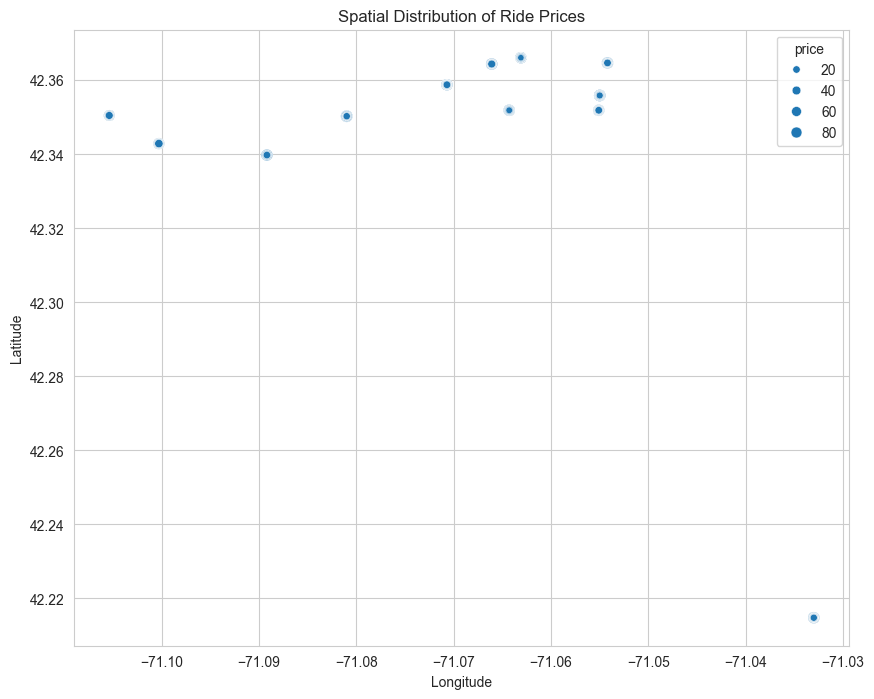

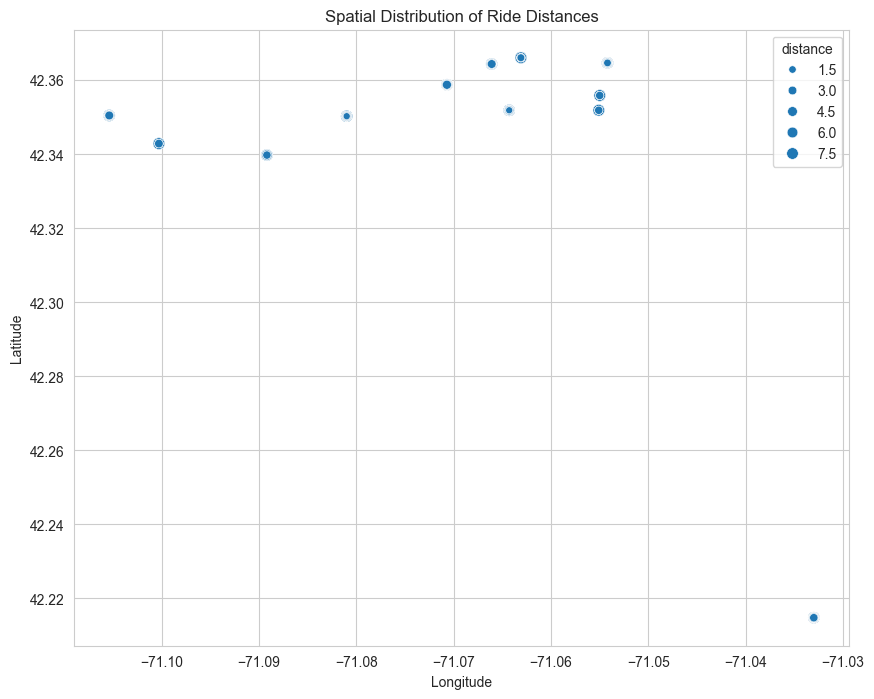

In [74]:
import seaborn as sns

# Create a scatter plot for ride prices
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', size='price', data=df)
plt.title('Spatial Distribution of Ride Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Create a scatter plot for ride distances
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', size='distance', data=df)
plt.title('Spatial Distribution of Ride Distances')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


### 6.

So in every day and every hour recorded, Uber seems to be dominating booking trips.

## c. Data Preprocessing / Feature Engineering

### 1. Removing Unnecessary Features

Since we are predicting the price, we are removing columns which do not have any effect on the final result. 

In [ ]:
rideshare = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)

In [ ]:
rideshare.shape

Let us check the correlation of our temperature related features with our target feature (Price)¶


In [ ]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']
df_temp = rideshare[temp_cols]
df_temp.head()

In [ ]:
plt.figure(figsize=(13,6))
sns.heatmap(df_temp.corr(),annot=True)

We see that all temperature related features have weak correlation with our target feature - price¶
Removing all of them will not make any impact to our regression model¶.

In [ ]:
rideshare = rideshare.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)
rideshare.shape

In [ ]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = rideshare[climate_column]
df_clim.head()

Let's check the correlation of our cilmate related features with our target feature (Price)¶

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df_clim.corr(),annot=True)

Apparently all climate related features also have weak correlation with our target feature - price.
Removing all of them will not make any impact to our regression model

In [ ]:
rideshare = rideshare.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
rideshare.shape

Let's check our categorical value in our dataset features

In [ ]:
category_col = rideshare.select_dtypes(include=['object','category']).columns.tolist()
for column in rideshare[category_col]:
    print(f'{column} : {rideshare[column].unique()}')
    print()

We can see that 'timezone' feature has only 1 value and 'product_id' feature contains many unidentified values. So we can remove or drop them.

In [ ]:
rideshare = rideshare.drop(['timezone','product_id'],axis=1)

In [ ]:
rideshare.shape

Let's check the correlation of our categorical features with our target feature (price)

In [ ]:
new_cat = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','price']

df_cat = rideshare[new_cat]
df_cat.head()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [ ]:
df_cat_encode

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df_cat_encode.corr(),annot=True)

We can see only name feature that has a relatively strong correlation. Source,destination, and cab_type features have relatively weak correlation, let us select cab_type feature because it has stronger correlation than other two features. Dropping rest of the columns.

In [ ]:
rideshare = rideshare.drop(['source','destination','short_summary','icon'],axis=1)
rideshare.head()

Removing hour, day, month, latitude, longitude, because we won't need them for now

In [ ]:
rideshare = rideshare.drop(['hour','day','month','latitude','longitude'],axis=1)
rideshare.head()

In [ ]:
rideshare.columns

### 2. Removing outliers

We're using IQR method for checking top and bottom outliers

In [ ]:
Qp12 = rideshare['price'].quantile(0.25)
Qp32 = rideshare['price'].quantile(0.75)
IQRp = Qp32-Qp12

rideshare[rideshare['price']>(Qp32+(1.5*IQRp))]

In [ ]:
print('Size before removing :',rideshare.shape)
rideshare= rideshare[~((rideshare['price']>(Qp32+(1.5*IQRp))))]
print('Size after removing :',rideshare.shape)

We can see that we have 5588 data outliers.

## d. Modelling - Regression

### 1. Encoding Data (One Hot Encoding)


In [ ]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [ ]:
rideshare_onehot = rideshare.copy()
for col in rideshare_onehot.select_dtypes(include='O').columns:
    rideshare_onehot=one_hot_encoder(rideshare_onehot,col)
    
rideshare_onehot.head()

### 2. Dataset Split


In [ ]:
from sklearn.model_selection import train_test_split

X = rideshare_onehot.drop(columns=['price'],axis=1).values
y = rideshare_onehot['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3. Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
# Fit to data training
model = reg.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

In [3]:
#question 2
from scipy.stats import poisson

# Calculate the Poisson probability
rate = 6.4
k = 5
probability = poisson.pmf(k, rate)

print(f'The Poisson probability of having exactly 5 arrivals when the average rate is 6.2 is {probability:.3f}')

The Poisson probability of having exactly 5 arrivals when the average rate is 6.2 is 0.149


In [6]:
#question 10
# Calculate the Poisson probability for at least one call in a minute
rate_per_minute = 28 / 60
k = 0
probability_at_least_one = 1 - poisson.pmf(k, rate_per_minute)

print(f'The Poisson probability of having at least one call in a minute when the average rate is 44 per hour is {probability_at_least_one:.3f}')

The Poisson probability of having at least one call in a minute when the average rate is 44 per hour is 0.373


In [7]:
#question 12
# Calculate the average time to process one job
jobs_per_minute = 4 / 10
average_time_per_job = 1 / jobs_per_minute

print(f'The average time to process one job is {average_time_per_job:.2f} minutes')

The average time to process one job is 2.50 minutes


In [9]:
#question 13
from scipy.stats import expon

# Calculate the probability that T is less than 7 for an exponential distribution with rate 0.2
rate = 0.5
probability_T_less_than_6 = expon.cdf(6, scale=1/rate)

print(f'The probability that T is less than 7 is {probability_T_less_than_6:.4f}')

The probability that T is less than 7 is 0.9502


In [13]:
#question 14
# Calculate the exponential probability for a service time of at most 6 minutes
rate = 0.62
probability_at_most_5 = expon.cdf(5, scale=1/rate)

print(f'The probability that the service time is at most 6 minutes is {probability_at_most_5:.4f}')

The probability that the service time is at most 6 minutes is 0.9550


In [16]:

#question 16
# Calculate the exponential probability for service time between 15 and 45 seconds
rate = 0.88 / 60  # Convert rate per minute to rate per second
probability_15_seconds = expon.cdf(15, scale=1/rate)
probability_45_seconds = expon.cdf(45, scale=1/rate)
probability_between_15_and_45 = probability_45_seconds - probability_15_seconds
percentage = probability_between_15_and_45 * 100

print(f'Approximately {percentage:.0f}% of customers will have a service time between 15 and 45 seconds.')

Approximately 29% of customers will have a service time between 15 and 45 seconds.


In [25]:
#question 18
# Correcting the calculation for the conditional probability using the memoryless property
# The memoryless property implies P(T <= t + s | T > s) = P(T <= t)
# Here, t = 30 - 9 = 21 minutes
remaining_time = 30 - 10
rate = 0.03
probability_at_most_21 = expon.cdf(remaining_time, scale=1/rate)

print(f'The corrected conditional probability that the service will take at most 30 minutes, given it has already taken more than 9 minutes, is {probability_at_most_21:.3f}')

The corrected conditional probability that the service will take at most 30 minutes, given it has already taken more than 9 minutes, is 0.451


In [21]:
#question19
import numpy as np

# Calculate the time at which 50% of customers have been served
cdf_value = 0.75  # 75% as a decimal
rate = 0.3
# Using the inverse CDF (quantile function) to find the time
time_at_50_percent = -np.log(1 - cdf_value) / rate

print(f'50% of customers will have a service time of at most {time_at_50_percent:.2f} minutes.')

50% of customers will have a service time of at most 4.62 minutes.


In [22]:
#question 20
# Calculate the time at which 90% of people have completed the download and installation
cdf_value = 0.9  # 90% as a decimal
rate = 0.53
# Using the inverse CDF (quantile function) to find the time
time_at_90_percent = -np.log(1 - cdf_value) / rate

print(f'90% of people will take at most {time_at_90_percent:.2f} minutes to download and install the program.')

90% of people will take at most 4.34 minutes to download and install the program.


In [23]:
#question 22
from scipy.stats import poissonx

# Calculate the probability of being served within 6 minutes as the 3rd customer
# Average service time is 3 minutes, so rate is 1/3 per minute
rate = 1 / 4
# To be served within 6 minutes, at least 3 services must occur in that time
services_needed = 3
# Use Poisson distribution to calculate the probability of at least 3 arrivals in 6 minutes
probability_served_within_6 = poisson.cdf(services_needed - 1, 8 * rate)

print(f'The probability of being served within 6 minutes is {1 - probability_served_within_6:.3f}')

The probability of being served within 6 minutes is 0.323
